# Shape descriptor analysis (Part 2)

We finally have some numbers to work with.
- **Traditional shape descriptors**: 11 numbers, like grain length, width, height, etc
- **Topological shape descriptors**: Variable number: from the Euler Characteristic Transform

How good are these descriptors? Can we characterize the shape of different founders based solely on their grain morphology? We can train a Support Vector Machine (SVM) with an 80/20 train/test breakdown and test the classification accuracy. The SVM can be trained with either
- Purely traditional descriptors
- Purely topological descriptors
- A combination of both descriptors

Take into account that the ECT produces extremely large vectors. To avoid pathological behavior, we must reduce their dimension as a first step.

In [1]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(viridis))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(reshape2))
suppressPackageStartupMessages(library(dplyr))

## Setup

In [2]:
source('/home/ejam/documents/barley_stacks/barley/descriptor_analysis_utils.R')

In [8]:
setwd('/home/ejam/documents/barley_stacks/preproc/norm_ect/results')
d <- 158
TT <- 8
kernel <- 'laplacedot'
dims <- 12
norm <- 'Normalized Size'

In [4]:
founders <- read.csv('../../../corrected_metadata.csv')
#founders_names_original <- sort(unique(founders$Founder))[-1]
founders_names_original <- levels(sort(unique(founders$Founder)))[-1]
founders_names <- founders_names_original
founders_names[5] <- 'CA Mariout'
founders_names[11] <- 'Good Delta'
founders_names[17] <- 'Maison Carree'
founders_names[24] <- 'Palmella Blue'
founders_names[28] <- 'WI Winter'
print(founders_names)

 [1] "Algerian"        "Alpha"           "Arequipa"        "Atlas"          
 [5] "CA Mariout"      "Club Mariout"    "Everest"         "Flynn"          
 [9] "Glabron"         "Golden Pheasant" "Good Delta"      "Han River"      
[13] "Hannchen"        "Horn"            "Lion"            "Lyallpur"       
[17] "Maison Carree"   "Manchuria"       "Meloy"           "Minia"          
[21] "Multan"          "Oderbrucker"     "Orel"            "Palmella Blue"  
[25] "Sandrel"         "Trebi"           "White Smyrna"    "WI Winter"      


## Combined descriptors

In [ ]:
info_type <- 'Combined'
filename <- paste('svm_results', 
                  tolower(info_type), d, TT, kernel, dims, 'founders.npy', sep='_')
imat <- RcppCNPy::npyLoad(filename, "integer")

results <- base::array(0, dim=c(dim(imat)[2], dim(imat)[2], dim(imat)[1]/dim(imat)[2]))
for(i in 1:dim(results)[3]){
  results[,,i] <- t(imat[((i-1)*dim(results)[1]+1):(i*dim(results)[1]), ])
}

foolist <- get_confusion(results)
mixed_confusion <- foolist[[1]]
mixed_accuracy <- foolist[[2]]

In [9]:
info_type <- 'Combined'
filename <- paste('svm_results',tolower(gsub(' ', '_', norm)), 
                  tolower(info_type), d, TT, kernel, dims, 'founders.rds', sep='_')

results <- base::readRDS(filename)
foolist <- get_confusion(results)
mixed_confusion <- foolist[[1]]
mixed_accuracy <- foolist[[2]]
mixed_precision <- foolist[[3]]
mixed_recall <- foolist[[4]]
mixed_f1 <- foolist[[5]]
support <- foolist[[6]]

mixed_avp <- average_scores(mixed_precision, support)
mixed_avr <- average_scores(mixed_recall, support)
mixed_avf <- average_scores(mixed_f1, support)

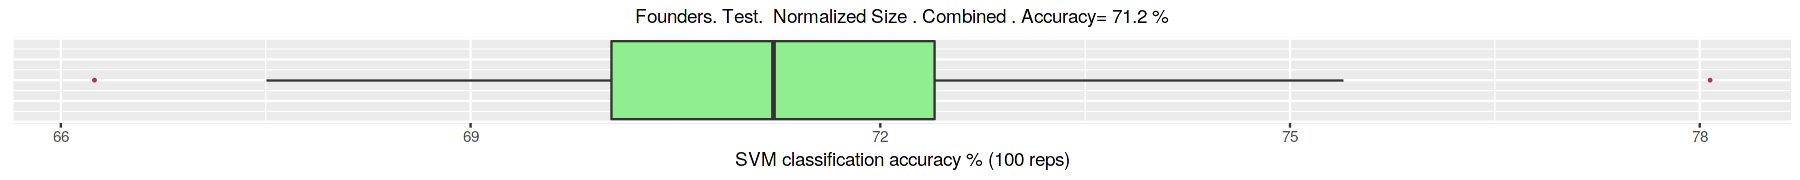

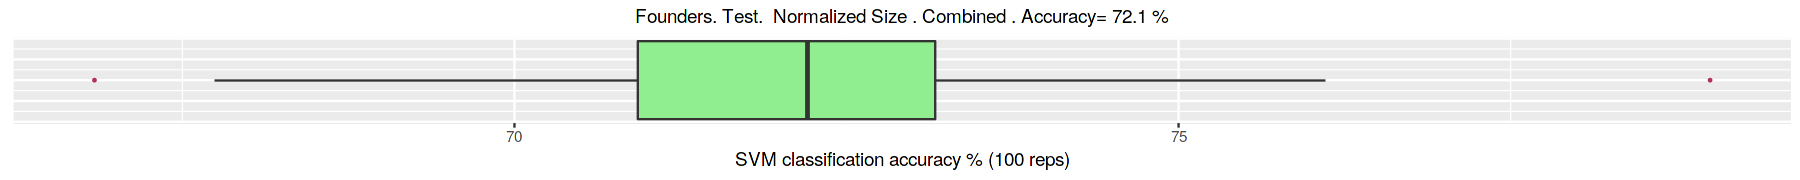

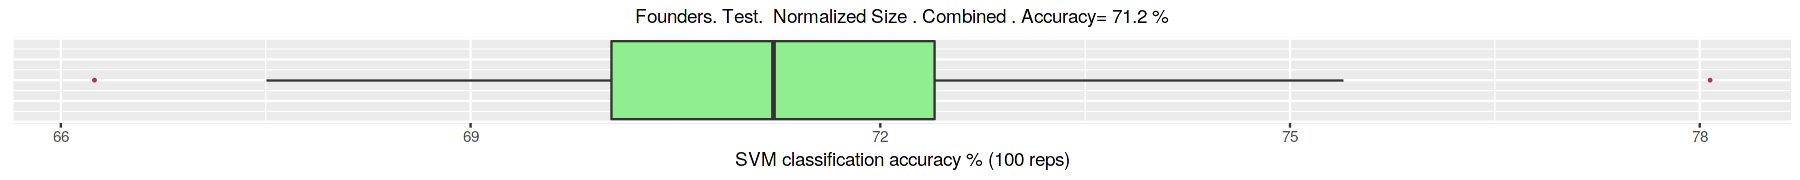

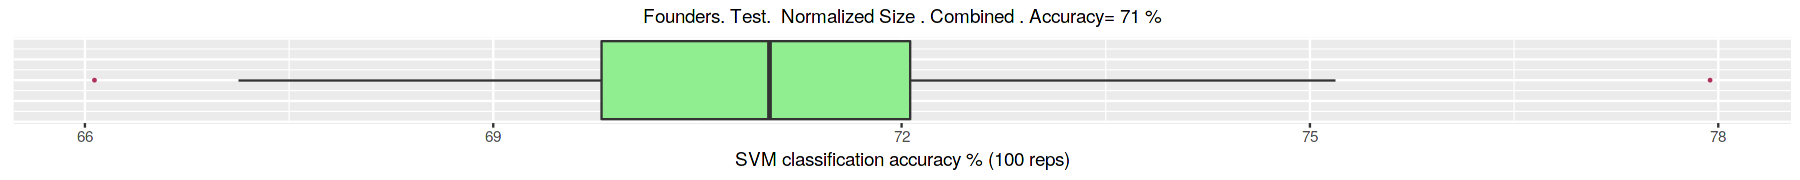

In [10]:
options(repr.plot.width=15, repr.plot.height=1.5)
plot_accuracy(mixed_accuracy, d, TT, kernel, dims, info_type, norm)
plot_accuracy(mixed_avp, d, TT, kernel, dims, info_type, norm)
plot_accuracy(mixed_avr, d, TT, kernel, dims, info_type, norm)
plot_accuracy(mixed_avf, d, TT, kernel, dims, info_type, norm)

In [ ]:
options(repr.plot.width=7.5, repr.plot.height=6.75)
p <- plot_confusion(mixed_confusion, founders_names, dim(results)[3], 'single', 
                    d, TT, kernel, dims, info_type, norm)
p

## Topological descriptors

In [14]:
info_type <- 'Topological'
filename <- paste('svm_results', 
                  tolower(info_type), d, TT, kernel, dims, 'founders.npy', sep='_')
imat <- RcppCNPy::npyLoad(filename, "integer")

results <- base::array(0, dim=c(dim(imat)[2], dim(imat)[2], dim(imat)[1]/dim(imat)[2]))
for(i in 1:dim(results)[3]){
  results[,,i] <- t(imat[((i-1)*dim(results)[1]+1):(i*dim(results)[1]), ])
}

foolist <- get_confusion(results)
topo_confusion <- foolist[[1]]
topo_accuracy <- foolist[[2]]

ERROR: Error in loadNamespace(name): there is no package called ‘RcppCNPy’


In [16]:
info_type <- 'Topological'
filename <- paste('svm_results',tolower(gsub(' ', '_', norm)), 
                  tolower(info_type), d, TT, kernel, dims, 'founders.rds', sep='_')

results <- base::readRDS(filename)
foolist <- get_confusion(results)
topo_confusion <- foolist[[1]]
topo_accuracy <- foolist[[2]]

topo_precision <- foolist[[3]]
topo_recall <- foolist[[4]]
topo_f1 <- foolist[[5]]
support <- foolist[[6]]

topo_avp <- average_scores(topo_precision, support)
topo_avr <- average_scores(topo_recall, support)
topo_avf <- average_scores(topo_f1, support)

In [ ]:
options(repr.plot.width=15, repr.plot.height=1.5)
plot_accuracy(topo_accuracy, d, TT, kernel, dims, info_type, norm)
plot_accuracy(topo_avp, d, TT, kernel, dims, info_type, norm)
plot_accuracy(topo_avr, d, TT, kernel, dims, info_type, norm)
plot_accuracy(topo_avf, d, TT, kernel, dims, info_type, norm)

In [ ]:
options(repr.plot.width=7.5, repr.plot.height=6.75)
p <- plot_confusion(topo_confusion, founders_names, dim(results)[3], 'single', 
                    d, TT, kernel, dims, info_type, norm)
p

## Traditional descriptors

In [12]:
info_type <- 'Traditional'
filename <- 'svm_results_traditional_founders.rds'

results <- base::readRDS(filename)
foolist <- get_confusion(results)
trad_confusion <- foolist[[1]]
trad_accuracy <- foolist[[2]]

trad_precision <- foolist[[3]]
trad_recall <- foolist[[4]]
trad_f1 <- foolist[[5]]
support <- foolist[[6]]

trad_avp <- average_scores(trad_precision, support)
trad_avr <- average_scores(trad_recall, support)
trad_avf <- average_scores(trad_f1, support)

In [ ]:
options(repr.plot.width=15, repr.plot.height=1.5)
plot_accuracy(trad_accuracy, d, TT, kernel, dims, info_type, norm)
plot_accuracy(trad_avp, d, TT, kernel, dims, info_type, norm)
plot_accuracy(trad_avr, d, TT, kernel, dims, info_type, norm)
plot_accuracy(trad_avf, d, TT, kernel, dims, info_type, norm)

In [ ]:
options(repr.plot.width=7.5, repr.plot.height=6.75)
p <- plot_confusion(trad_confusion, founders_names, dim(results)[3], 'single', 
                    d, TT, kernel, dims, info_type, norm)
p

In [ ]:
signif(quantile(trad_accuracy, c(0.25, 0.5, 0.75)),2)
signif(quantile(topo_accuracy, c(0.25, 0.5, 0.75)),2)
signif(quantile(mixed_accuracy, c(0.25, 0.5, 0.75)),2)

signif(mean(trad_accuracy)*100, 3)
signif(mean(topo_accuracy)*100, 3)
signif(mean(mixed_accuracy)*100, 3)

In [ ]:
plot(mixed_avp, rep(1,length(mixed_avp)))

In [17]:
signif(quantile(trad_avp, c(0.25, 0.5, 0.75)),3)
signif(quantile(topo_avp, c(0.25, 0.5, 0.75)),3)
signif(quantile(mixed_avp, c(0.25, 0.5, 0.75)),3)

c(signif(mean(trad_avp), 2) , signif(mean(topo_avp), 2), signif(mean(mixed_avp), 2))
c(signif(3*sd(trad_avp), 2) , signif(3*sd(topo_avp), 2), signif(3*sd(mixed_avp), 2))

25%   50%   75% 
0.558 0.568 0.577

25%   50%   75% 
0.539 0.553 0.574

25%   50%   75% 
0.709 0.722 0.732

[1] 0.57 0.56 0.72

[1] 0.058 0.062 0.059

In [18]:
signif(quantile(trad_avr, c(0.25, 0.5, 0.75)),2)
signif(quantile(topo_avr, c(0.25, 0.5, 0.75)),2)
signif(quantile(mixed_avr, c(0.25, 0.5, 0.75)),2)

c(signif(mean(trad_avr), 2) , signif(mean(topo_avr), 2), signif(mean(mixed_avr), 2))
c(signif(sd(trad_avr), 2) , signif(sd(topo_avr), 2), signif(sd(mixed_avr), 2))

25%  50%  75% 
0.55 0.56 0.57

25%  50%  75% 
0.54 0.55 0.57

25%  50%  75% 
0.70 0.71 0.72

[1] 0.56 0.55 0.71

[1] 0.019 0.019 0.019

In [19]:
signif(quantile(trad_avf, c(0.25, 0.5, 0.75)),2)
signif(quantile(topo_avf, c(0.25, 0.5, 0.75)),2)
signif(quantile(mixed_avf, c(0.25, 0.5, 0.75)),2)

c(signif(mean(trad_avf), 2) , signif(mean(topo_avf), 2), signif(mean(mixed_avf), 2))
c(signif(sd(trad_avf), 2) , signif(sd(topo_avf), 2), signif(sd(mixed_avf), 2))

25%  50%  75% 
0.54 0.55 0.56

25%  50%  75% 
0.53 0.55 0.56

25%  50%  75% 
0.70 0.71 0.72

[1] 0.55 0.55 0.71

[1] 0.019 0.019 0.019

## Pairwise comparison

In [ ]:
source('/home/ejam/documents/barley_stacks/barley/descriptor_analysis_utils.R')

In [ ]:
info_type <- 'Combined vs Traditional'
options(repr.plot.width=7.5, repr.plot.height=6.5)
conf_diff <- (mixed_confusion - trad_confusion)/dim(results)[3]
rownames(conf_diff) <- founders_names
colnames(conf_diff) <- founders_names

p <- plot_comparison(conf_diff, founders_names, d, TT, kernel, dims, info_type, norm)
p

In [ ]:
acc <- round(diag(conf_diff)*100, 2)
print(sort(acc))
paste('Median diag:', median(acc))
paste('Mean diag:', round(mean(acc),2))

## Combined vs Topological 

In [ ]:
info_type <- 'Combined vs Topological'
options(repr.plot.width=7.5, repr.plot.height=6.5)
conf_diff <- (mixed_confusion - topo_confusion)/dim(results)[3]
rownames(conf_diff) <- founders_names
colnames(conf_diff) <- founders_names

p <- plot_comparison(conf_diff, founders_names, d, TT, kernel, dims, info_type, norm)
p

In [ ]:
acc <- round(diag(conf_diff)*100, 2)
print(sort(acc))
paste('Median diag:', median(acc))
paste('Mean diag:', round(mean(acc),2))

## Traditional vs Topological 

In [ ]:
info_type <- 'Traditional vs Topological'
options(repr.plot.width=7.5, repr.plot.height=6.5)
conf_diff <- (trad_confusion - topo_confusion)/dim(results)[3]
rownames(conf_diff) <- founders_names
colnames(conf_diff) <- founders_names

p <- plot_comparison(conf_diff, founders_names, d, TT, kernel, dims, info_type, norm)
p

In [ ]:
acc <- round(diag(conf_diff)*100, 2)
print(sort(acc))
paste('Median diag:', median(acc))
paste('Mean diag:', round(mean(acc),2))

## More comparisons

In [27]:
svm_scores <- matrix(0,ncol=3,nrow=length(founders_names))
base::rownames(svm_scores) <- founders_names
base::colnames(svm_scores) <- c('Traditional', 'Topological', 'Combined')
svm_scores[,1] <- base::colMeans(trad_precision)
svm_scores[,2] <- base::colMeans(topo_precision)
svm_scores[,3] <- base::colMeans(mixed_precision)
df_original <- data.frame(svm_scores)
df_original$Min = apply(df_original, 1, FUN=min)
df_original$Max = apply(df_original, 1, FUN=max)
df_original$Line <- founders_names
#df_original$Line <- factor(df_original$Line, levels=df_original$Line[1:nrow(df_original)])

In [30]:
svm_scores <- matrix(0,ncol=3,nrow=length(founders_names))
base::rownames(svm_scores) <- founders_names
base::colnames(svm_scores) <- c('Traditional', 'Topological', 'Combined')
svm_scores[,1] <- base::colMeans(trad_recall)
svm_scores[,2] <- base::colMeans(topo_recall)
svm_scores[,3] <- base::colMeans(mixed_recall)
df_original <- data.frame(svm_scores)
df_original$Min = apply(df_original, 1, FUN=min)
df_original$Max = apply(df_original, 1, FUN=max)
df_original$Line <- founders_names
#df_original$Line <- factor(df_original$Line, levels=df_original$Line[1:nrow(df_original)])

In [33]:
svm_scores <- matrix(0,ncol=3,nrow=length(founders_names))
base::rownames(svm_scores) <- founders_names
base::colnames(svm_scores) <- c('Traditional', 'Topological', 'Combined')
svm_scores[,1] <- base::colMeans(trad_f1)
svm_scores[,2] <- base::colMeans(topo_f1)
svm_scores[,3] <- base::colMeans(mixed_f1)
df_original <- data.frame(svm_scores)
df_original$Min = apply(df_original, 1, FUN=min)
df_original$Max = apply(df_original, 1, FUN=max)
df_original$Line <- founders_names
#df_original$Line <- factor(df_original$Line, levels=df_original$Line[1:nrow(df_original)])

In [34]:
descriptor  <- 'Combined'
info_type <- descriptor
df <- dplyr::arrange(df_original, desc(df_original[descriptor]))
df$Line <- factor(df$Line, levels=df$Line[1:nrow(df_original)])

In [29]:
dfmp <- reshape2::melt(df, id.vars=c("Line", 'Min', 'Max'), variable.name='Descriptor')

In [32]:
dfmr <- reshape2::melt(df, id.vars=c("Line", 'Min', 'Max'), variable.name='Descriptor')

In [35]:
dfmf <- reshape2::melt(df, id.vars=c("Line", 'Min', 'Max'), variable.name='Descriptor')

In [ ]:
options(repr.plot.width=15, repr.plot.height=4)

colors <- c('firebrick1', 'blue', 'black')
titlename <- paste('Classification Average Accuracy (',d, ' directions, ', TT, ' thresholds)', sep='')
p <- ggplot(dfm) +
  geom_segment( aes(x=Line, xend=Line, y=Min, yend=Max), color="grey", size=1) +
  geom_point( aes(x=Line, y=value, color=Descriptor, shape=Descriptor), size=3) +
  scale_color_manual(values=colors) +
  theme(plot.title = element_text(hjust = 0.5, vjust = 0, size=16),
        axis.text.x = element_text(size = 11, angle=90),
        axis.text.y = element_text(size = 11),
        axis.title = element_text(size=14),
        legend.text = element_text(size=11)) +
  ylab('Accuracy (%)') +
  ggtitle(titlename) +
  xlab('Barley Line')

filename <- paste('avg_accuracy', tolower(gsub(' ', '_', norm)), 
                      gsub(' ', '_', tolower(descriptor)), d, TT, kernel, dims, 'horz', sep='_')
p
#ggplot2::ggsave(paste(filename, '.png', sep=''), plot=p, device='png', width=9, height=4)
#ggplot2::ggsave(paste(filename, '.pdf', sep=''), plot=p, device='pdf', width=9, height=4)

In [ ]:
options(repr.plot.width=7.5, repr.plot.height=7)

colors <- c('firebrick1', 'blue', 'black')
p <- ggplot(dfm) +
  geom_segment( aes(x=Line, xend=Line, y=Min, yend=Max), color="grey", size=1) +
  geom_point( aes(x=Line, y=value, color=Descriptor, shape=Descriptor), size=3) +
  scale_color_manual(values=colors) +
  theme(plot.title = element_text(hjust = 0.5, vjust = 2, size=17),
        axis.text.x = element_text(size = 13, angle=90),
        axis.text.y = element_text(size = 12),
        axis.title = element_text(size=15),
        legend.position = 'top',
        legend.text = element_text(size=12),
        legend.background = element_rect(color='grey', fill='grey95')) +
  ylab('Accuracy (%)') +
  ggtitle(titlename) +
  xlab('Barley Line')

filename <- paste('avg_accuracy', tolower(gsub(' ', '_', norm)), 
                      gsub(' ', '_', tolower(descriptor)), d, TT, kernel, dims, 'vert', sep='_')
p
ggplot2::ggsave(paste(filename, '.png', sep=''), plot=p, device='png', width=7.5, height=7)
ggplot2::ggsave(paste(filename, '.pdf', sep=''), plot=p, device='pdf', width=7.5, height=7)

In [36]:
dfmp$Score <- 'Precision'
dfmr$Score <- 'Recall'
dfmf$Score <- 'F1'

In [38]:
dfm <- rbind(dfmf, dfmp, dfmr)
dfm$Score <- factor(dfm$Score, levels=c('F1','Precision','Recall'))
dfm

Line,Min,Max,Descriptor,value,Score
<fct>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
Han River,0.5894859,0.9480506,Traditional,0.9262044,F1
Sandrel,0.5099401,0.8504705,Traditional,0.6016567,F1
Everest,0.5636654,0.8336444,Traditional,0.8156138,F1
Hannchen,0.3299158,0.7969875,Traditional,0.7780499,F1
Good Delta,0.5237798,0.7943659,Traditional,0.6128155,F1
Palmella Blue,0.2172476,0.8147390,Traditional,0.8147390,F1
Multan,0.6273351,0.7771474,Traditional,0.6273351,F1
CA Mariout,0.5655039,0.7663529,Traditional,0.5655039,F1
Orel,0.3465495,0.7495430,Traditional,0.5609522,F1


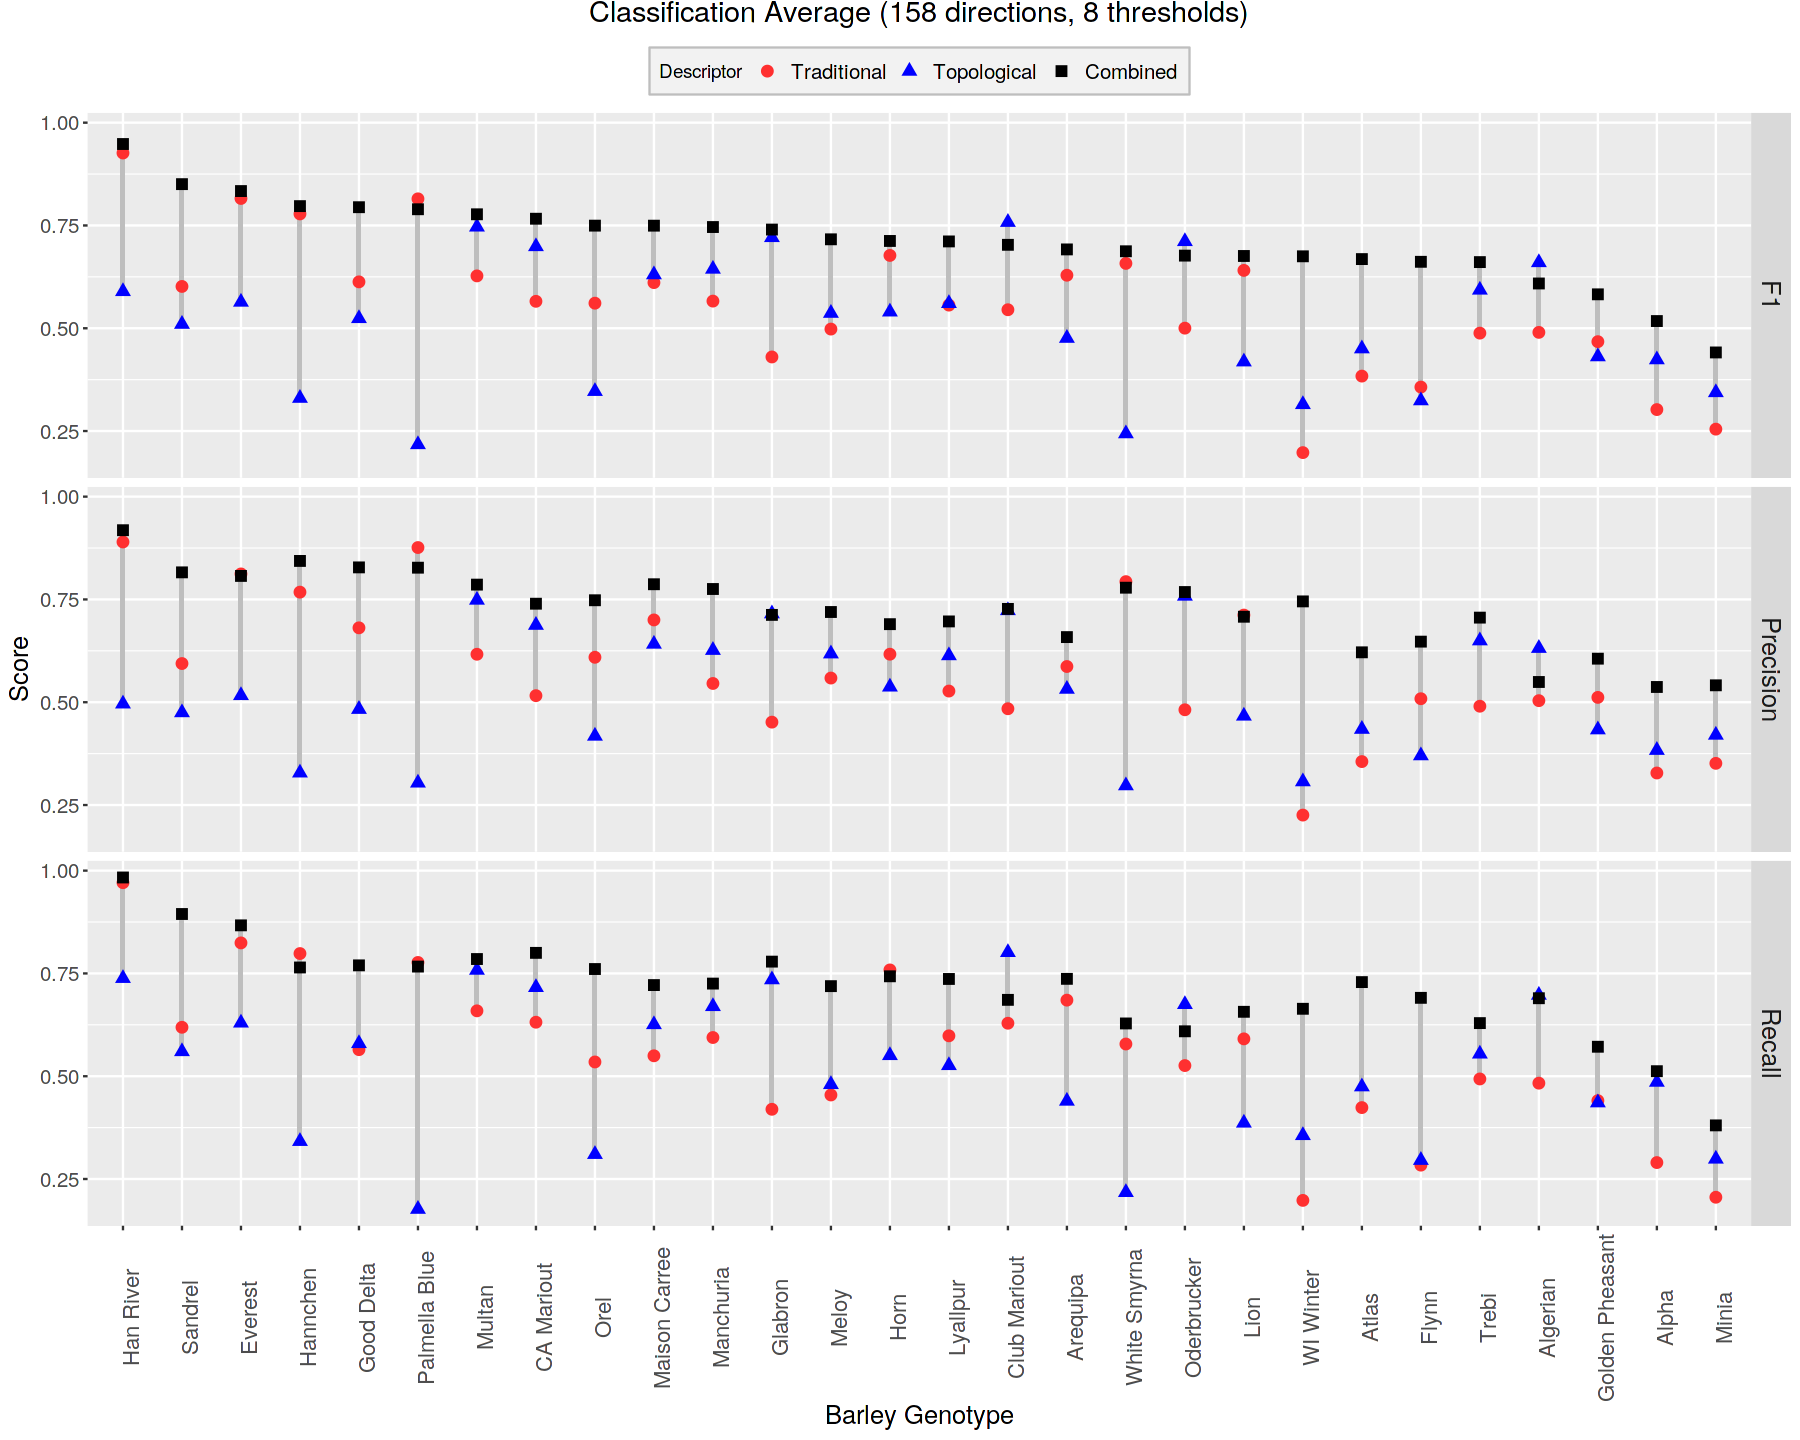

In [39]:
options(repr.plot.width=15, repr.plot.height=12)

colors <- c('firebrick1', 'blue', 'black')
titlename <- paste('Classification Average (',d, ' directions, ', TT, ' thresholds)', sep='')
p <- ggplot(dfm) +
  geom_segment( aes(x=Line, xend=Line, y=Min, yend=Max), color="grey", size=1) +
  geom_point( aes(x=Line, y=value, color=Descriptor, shape=Descriptor), size=3) +
  facet_grid(rows=vars(Score)) +
  scale_color_manual(values=colors) +
  theme(plot.title = element_text(hjust = 0.5, vjust = 2, size=17),
        axis.text.x = element_text(size = 13, angle=90),
        axis.text.y = element_text(size = 12),
        axis.title = element_text(size=15),
        legend.position = 'top',
        legend.text = element_text(size=12),
        strip.text = element_text(size=15),
        legend.background = element_rect(color='grey', fill='grey95')) +
  ylab('Score') +
  ggtitle(titlename) +
  xlab('Barley Genotype')
p

In [40]:
filename <- paste('avg_scores', tolower(gsub(' ', '_', norm)), 
                      gsub(' ', '_', tolower(descriptor)), d, TT, kernel, dims, sep='_')
ggplot2::ggsave(paste(filename, '.png', sep=''), plot=p, device='png', width=12, height=9)
ggplot2::ggsave(paste(filename, '.pdf', sep=''), plot=p, device='pdf', width=12, height=9)
ggplot2::ggsave(paste(filename, '.jpg', sep=''), plot=p, device='jpg', dpi=300, width=12, height=9)

In [ ]:
colnames(mixed_precision) <- founders_names
foo <- base::colMeans(mixed_precision)
print(sort(foo, TRUE))

In [ ]:
colnames(mixed_recall) <- founders_names
foo <- base::colMeans(mixed_recall)
print(sort(foo,TRUE))